# Часть 1: K-Means
## Кластеризация исполнителей по жанрам

В этом задании вы попробуете кластеризовать исполнителей по жанрам на основе данных о прослушивании.

В матрице sample_matrix по строкам стоят пользователи, а по столбцам - исполнители.

Для каждой пары (пользователь,исполнитель) в таблице стоит число - доля (процент) прослушивания этого исполнителя выбранным пользователем.

## Импорт библиотек, загрузка данных

In [1]:
import pandas as pd

C:\Users\alena\AppData\Local\Temp\ipykernel_6188\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
RANDOM_STATE = 42

In [3]:
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')

In [4]:
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [5]:
ratings = ratings.T

Выкиньте строку под названием `user`.

In [6]:
# ваш код здесь
ratings.drop('user', axis=0, inplace=True)

## Вопрос для Quiz

Сколько строк осталось в матрице ratings?  

Ответ: 1000

Заполните пропуски нулями.

In [7]:
# ваш код здесь
ratings.fillna(0, inplace=True)

Нормализуйте данные при помощи `normalize`.

In [8]:
from sklearn.preprocessing import normalize

# ваш код здесь
ratings = pd.DataFrame(normalize(ratings), columns=ratings.columns, index=ratings.index)

In [9]:
ratings

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,0.000000,0.000000,0.000000,0.0,0.012054,0.000000,0.0,0.0,0.025864,0.004880,...,0.000000,0.0,0.033554,0.010569,0.002199,0.004952,0.0,0.021302,0.0,0.000000
radiohead,0.009348,0.084688,0.000000,0.0,0.039505,0.002894,0.0,0.0,0.000000,0.008771,...,0.008120,0.0,0.000000,0.000000,0.005122,0.000000,0.0,0.000000,0.0,0.000000
deathcab for cutie,0.000000,0.017278,0.020144,0.0,0.024333,0.000000,0.0,0.0,0.000000,0.009391,...,0.085361,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.019622
coldplay,0.000000,0.000000,0.000000,0.0,0.011129,0.000000,0.0,0.0,0.000000,0.000000,...,0.144628,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
modest mouse,0.000000,0.000000,0.000000,0.0,0.010260,0.000000,0.0,0.0,0.000000,0.019597,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
michal w. smith,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
群星,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
agalloch,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
meshuggah,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


Примените KMeans с 5ю кластерами на преобразованной матрице (сделайте fit, а затем вычислите кластеры при помощи predict).

In [10]:
from sklearn.cluster import KMeans

# ваш код здесь
kmeans = KMeans(n_clusters=5, random_state=RANDOM_STATE)
kmeans.fit(ratings)

KMeans(n_clusters=5, random_state=42)

Выведите на экран центры кластеров (центроиды)

In [11]:
# ваш код здесь

centroids = kmeans.cluster_centers_
centroids

array([[ 1.67830066e-03, -4.33680869e-19,  1.21266299e-04, ...,
         1.08420217e-18,  0.00000000e+00, -8.67361738e-19],
       [ 1.88589225e-03,  1.06654937e-04,  8.09463797e-04, ...,
         2.68938484e-03,  0.00000000e+00,  1.19757379e-03],
       [ 3.55821439e-04,  1.44240237e-04,  1.73721732e-03, ...,
         1.59066890e-04,  5.16646974e-03,  4.29001462e-04],
       [-1.30104261e-18,  1.60551391e-03,  1.92730597e-03, ...,
         8.36063816e-03,  0.00000000e+00, -1.08420217e-18],
       [ 2.14071913e-03,  1.93800900e-03,  1.67549440e-03, ...,
         3.78204679e-04,  1.58093924e-03,  3.39174746e-03]])

Для каждого кластера найдем топ-10 исполнителей, наиболее близких к центроидам соотвествующего кластера.

Схожесть исполнителей будем считать по косинусной мере (spatial.distance.cosine).

## Quiz

Вычислите расстояние между "the beatles" и "coldplay". Ответ округлите до сотых.


In [12]:
from scipy import spatial

# ваш код здесь
dist = spatial.distance.cosine(ratings.loc['the beatles'], ratings.loc['coldplay'])
print(round(dist, 2))

0.9


Ниже для вашего удобства написана функция, принимающая на вход:
* np.array points - все точки кластера
* pt - центроид кластера
* K = 10 - число
Функция возвращает K индексов объектов (строк в массиве points), ближайших к центроиду.

In [13]:
def pClosest(points, pt, K=10):
    ind = [i[0] for i in sorted(enumerate(points), key=lambda x: spatial.distance.cosine(x[1], pt))]

    return ind[:K]

Примените функцию pClosest (или придумайте свой подход) и выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду.

In [14]:
# ваш код здесь
counter = 1
for n in centroids:
    print(f'Cluster number {counter}')
    ind = ratings.index[pClosest(ratings.values, n)]
    print(ind)
    counter += 1

Cluster number 1
Index(['nas', 'jay-z', 'kanye west', 'lupe the gorilla',
       'a tribe called quest', 'the roots featuring d'angelo', 'gangstarr',
       'little brother', 'lil' wayne', 'murs and 9th wonder'],
      dtype='object')
Cluster number 2
Index(['fall out boy', 'the all-americian rejects', 'paramore',
       'kelly clarkson', 'john mayer', 'the fray', 'maroon5',
       'dashboard confesssional', 'somethings corporate', 'coldplay'],
      dtype='object')
Cluster number 3
Index(['brand new', 'blink-182', 'alkaline trio', 'against me!', 'underoath',
       'descendents', 'new found glory', 'less than jake', 'thrice',
       'chiodos'],
      dtype='object')
Cluster number 4
Index(['the beatles', 'the rolling stones', 'dylan. bob', 'who',
       'led zeppelin.', 'miles davis.', 'simon and garfunkel', 'young, neil',
       'pink fluid', 'velvet underground'],
      dtype='object')
Cluster number 5
Index(['radiohead', 'the arcade fire', 'the shins', 'sufjan stevens',
       'bel

## Quiz

Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

Ответ:

Кластеры выделяются неплохо, но с погрешностями (жанры иногда плохо угадываются)

Кластеры осмысленные (каждый кластер можно отнести к некоторому музыкальному жанру)

# Часть 2: сравнение алгоритмов кластеризации

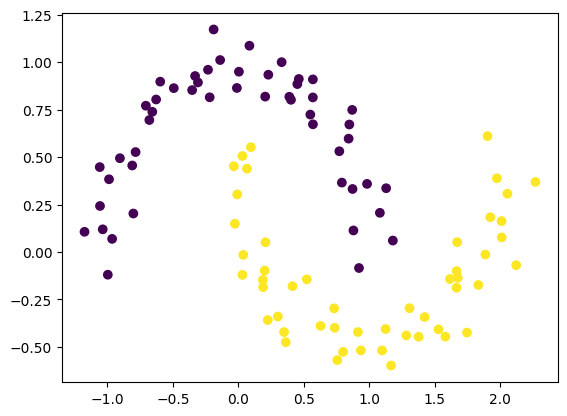

In [15]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

data = make_moons(n_samples=100, noise=0.1, random_state=42)

X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y)

Далее вы попробуете разные кластеризации для поиска кластеров. Также замеряйте время работы каждого метода.

Попробуйте найти кластеры при помощи KMeans

In [16]:
# ваш код здесь
kmeans_2 = KMeans(n_clusters=2, random_state=RANDOM_STATE)
kmeans_2.fit(X)

KMeans(n_clusters=2, random_state=42)

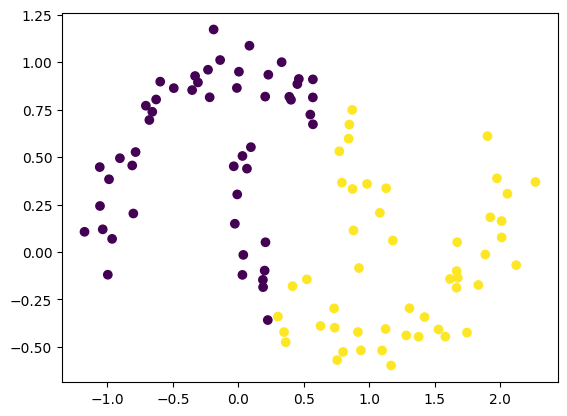

In [17]:
plt.scatter(X[:,0], X[:,1], c = kmeans_2.labels_)

## Quiz

Подберите $\varepsilon$ и min_samples в DBSCAN, чтобы наилучшим образом найти кластеры.
Ищите гиперпараметры из диапазонов:
* eps in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
* min_samples in [4, 5, 6, 7]

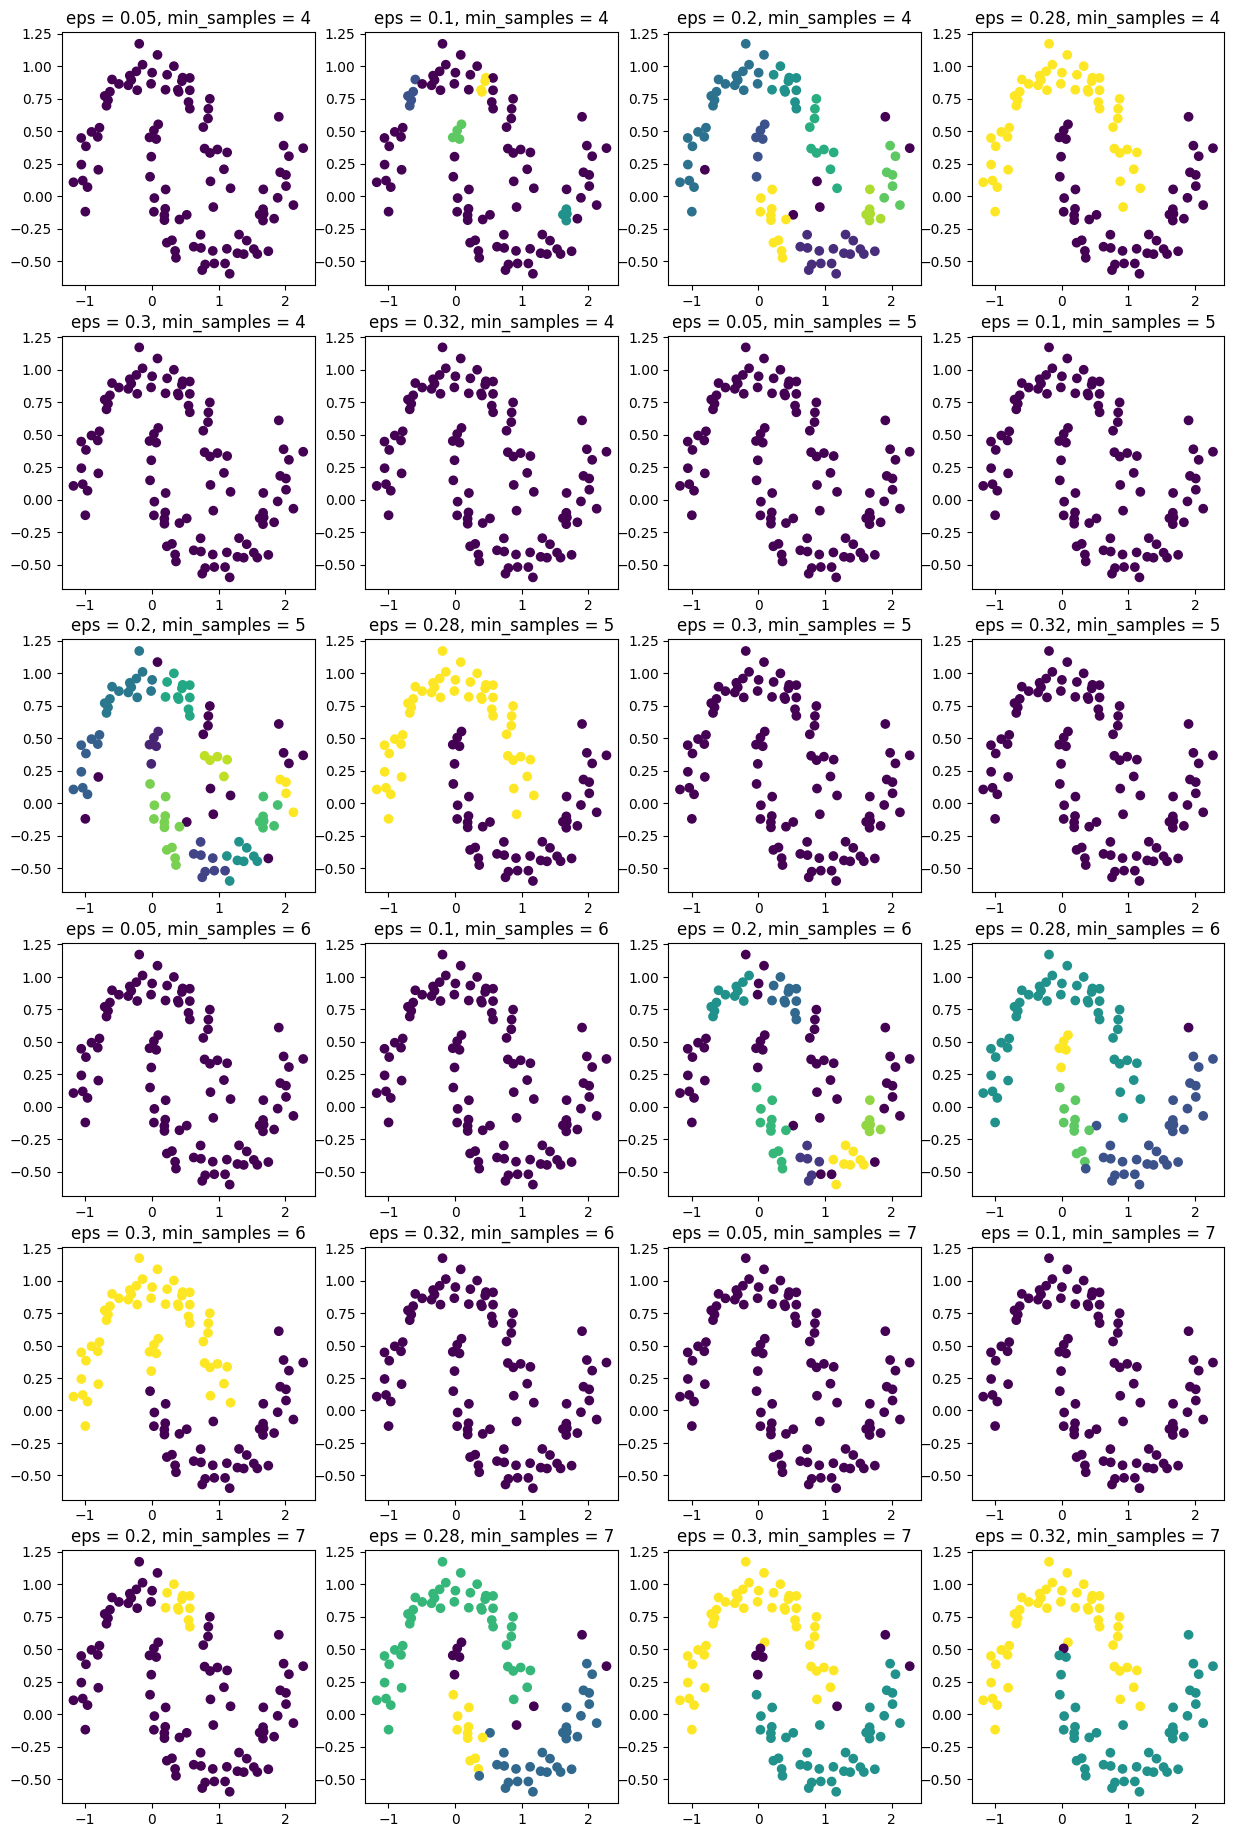

In [23]:
# ваш код здесь
from sklearn.cluster import DBSCAN

plt.figure(figsize= (15,23))
i = 1
for samples in [4, 5, 6, 7]:
    for e in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)
        plt.subplot(6, 4, i)
        plt.scatter(X[:,0], X[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
 #   i+=1

plt.show()

## Quiz

Используйте иерархическую кластеризацию для поиска кластеров.
Задайте в методе 2 кластера. Подберите гиперпараметр linkage из списка ['ward', 'complete', 'average', 'single'], дающий наилучший результат.

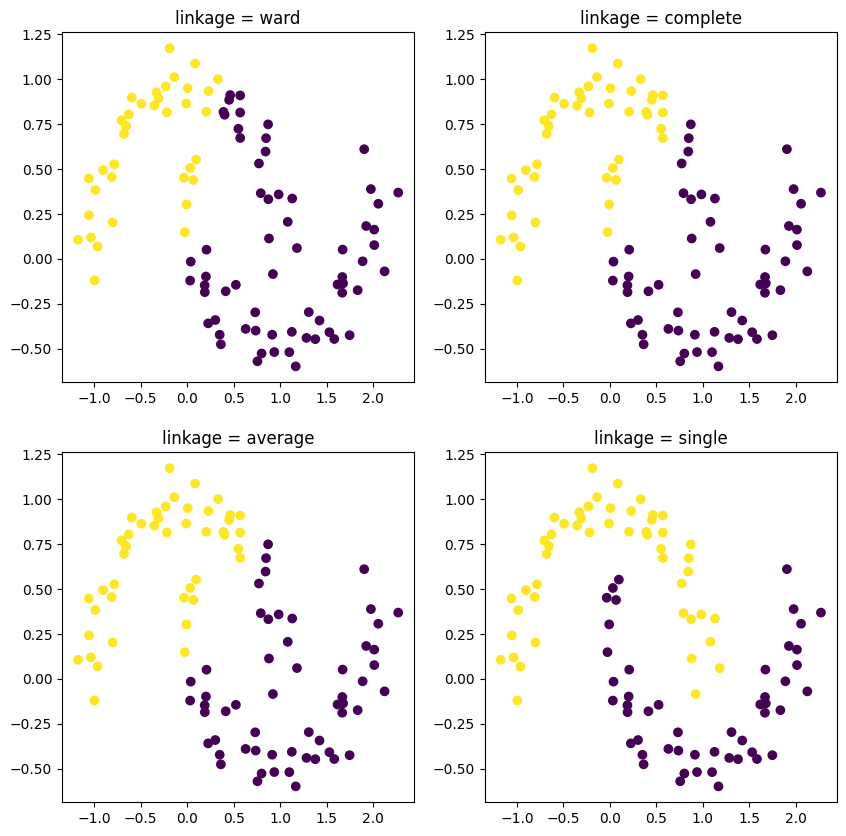

In [27]:
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize= (10, 10))
i = 1
for linkage in ['ward', 'complete', 'average', 'single']:
    aglomerate = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    clusters = aglomerate.fit_predict(X)
    plt.subplot(2, 2, i)
    plt.scatter(X[:,0], X[:,1], c = clusters)
    plt.title('linkage = {}'.format(linkage))
    i += 1
plt.show()

## Quiz

Попробуйте найти кластеры при помощи спектральной кластеризации.
Задайте 2 кластера, affinity='nearest_neighbors', random_state=42. Подберите гиперпараметр n_neighbors из диапазона [1,2,...,19], чтобы добиться наилучшего результата.

C:\Users\alena\.virtualenvs\practical_ml-ylDaoyg-\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\alena\.virtualenvs\practical_ml-ylDaoyg-\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\alena\.virtualenvs\practical_ml-ylDaoyg-\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\alena\.virtualenvs\practical_ml-ylDaoyg-\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


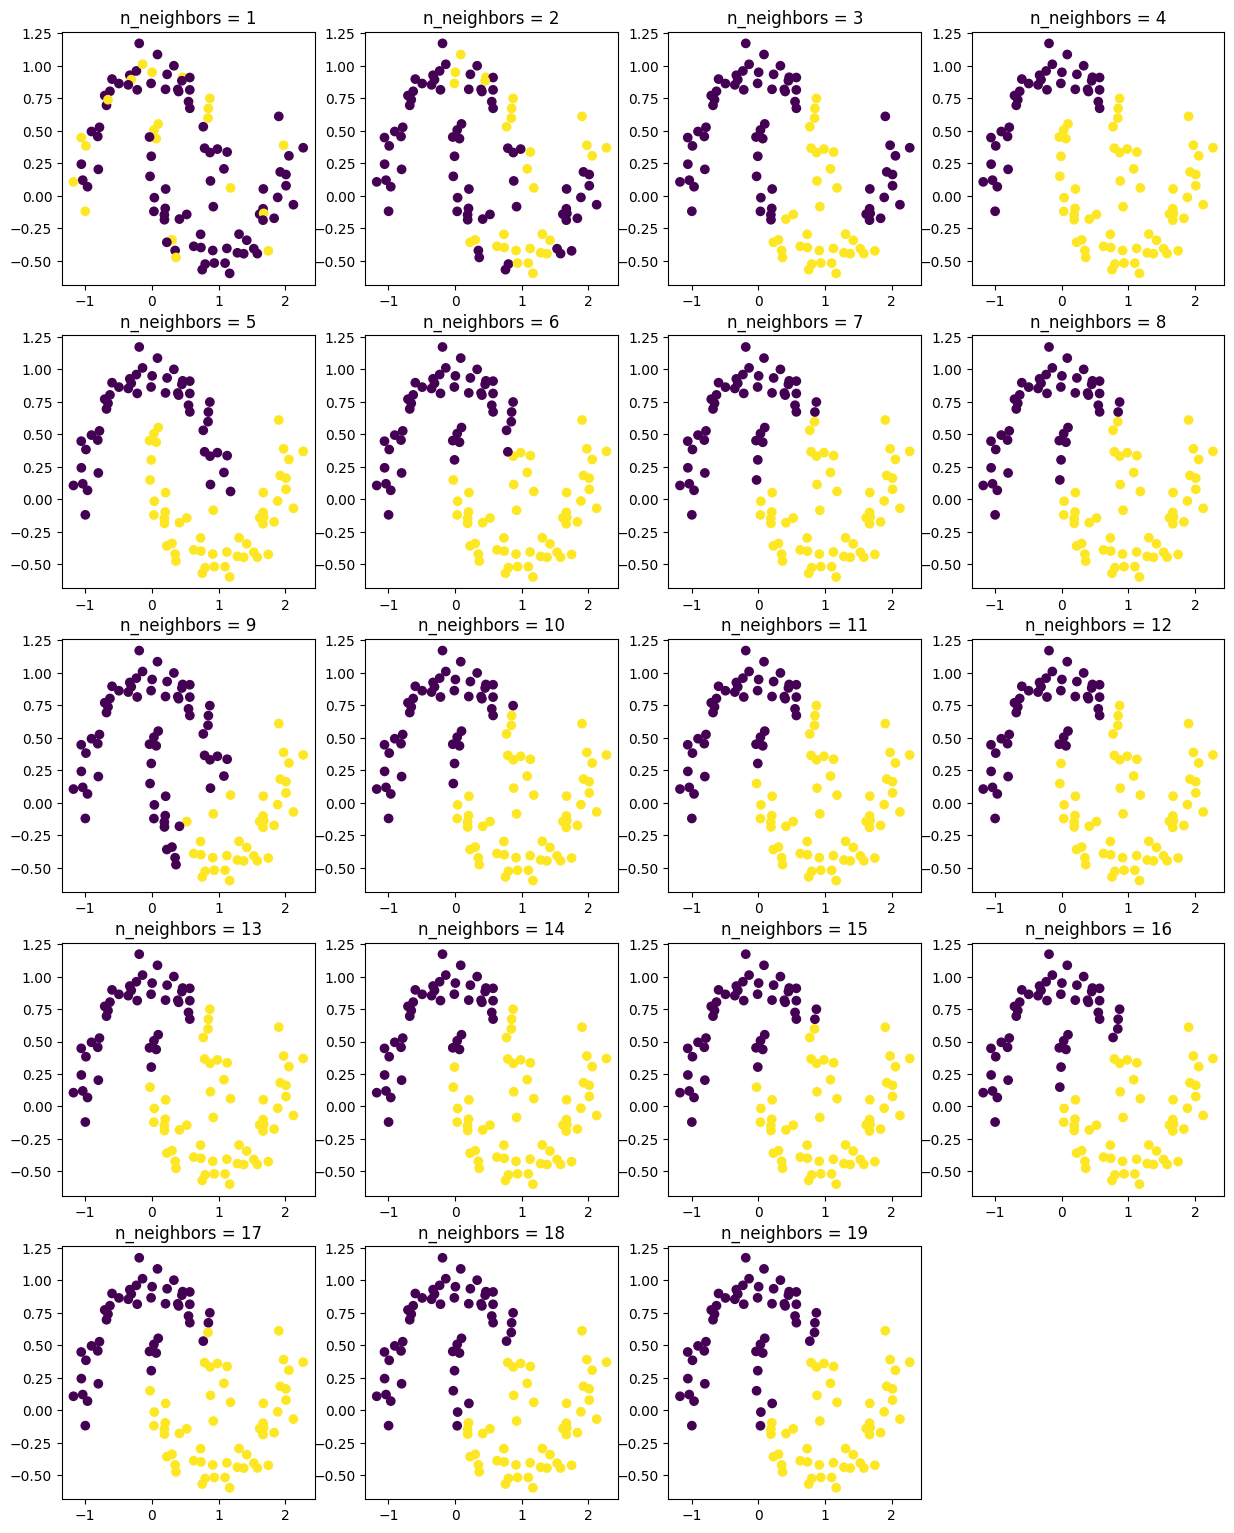

In [29]:
# ваш код здесь
from sklearn.cluster import SpectralClustering

plt.figure(figsize= (15,23))
i = 1
for n_neighbors in range(1, 20):
    spectr = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=n_neighbors, random_state=42)
    clusters = spectr.fit_predict(X)
    plt.subplot(6, 4, i)
    plt.scatter(X[:,0], X[:,1], c = clusters)
    plt.title('n_neighbors = {}'.format(n_neighbors))
    i += 1

plt.show()

## Quiz

Сделайте выводы: какой метод сработал лучше других? какой метод сработал быстрее? есть ли метод, наилучший и по качеству, и по времени одновременно?